In [16]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  MinMaxScaler, PolynomialFeatures, FunctionTransformer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [3]:
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
category_column=data.select_dtypes(include='object')
unique_values={}
for column in category_column.columns:
    unique_values[column]=data[column].unique()
unique_values

{'Sex': array(['M', 'F'], dtype=object),
 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object),
 'ExerciseAngina': array(['N', 'Y'], dtype=object),
 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object)}

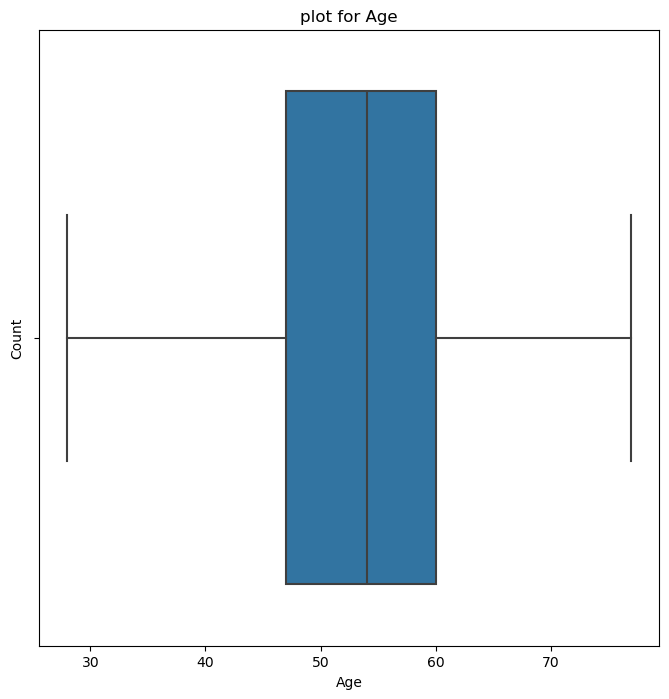

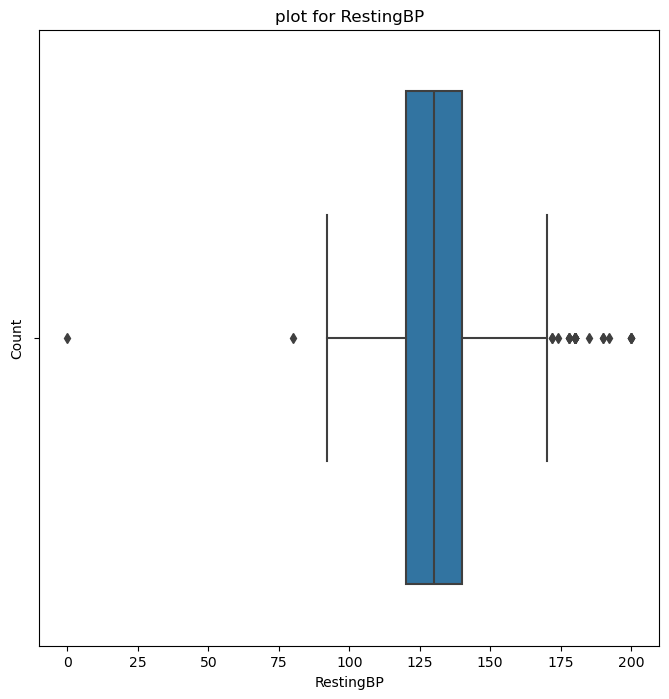

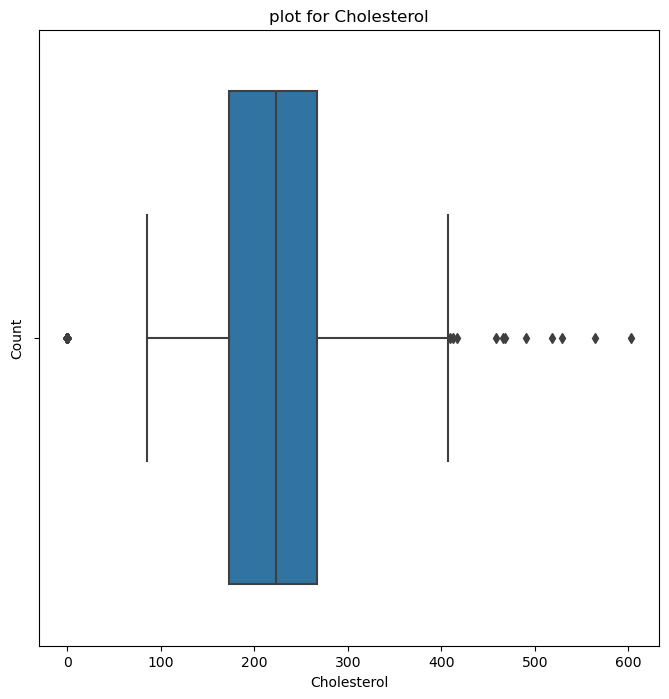

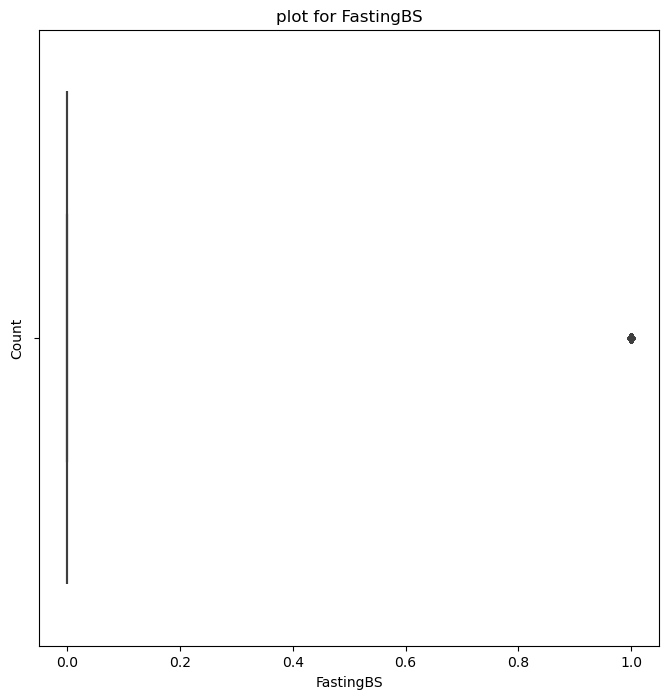

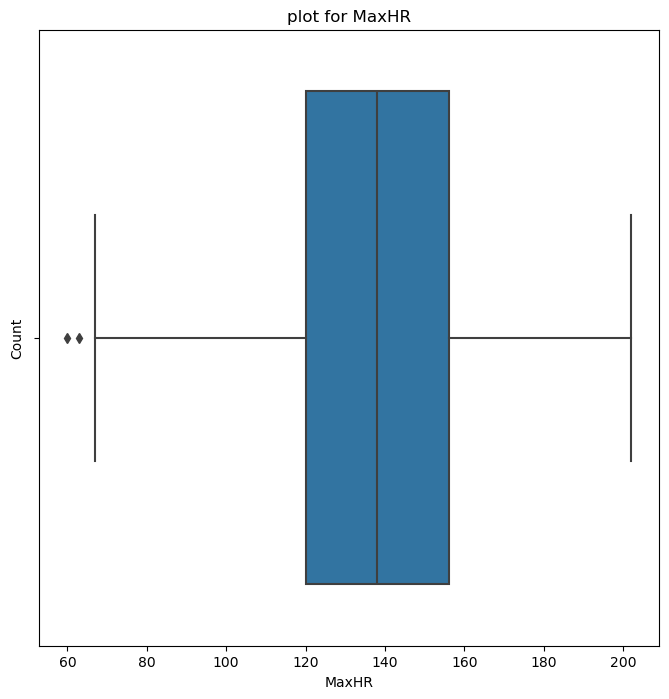

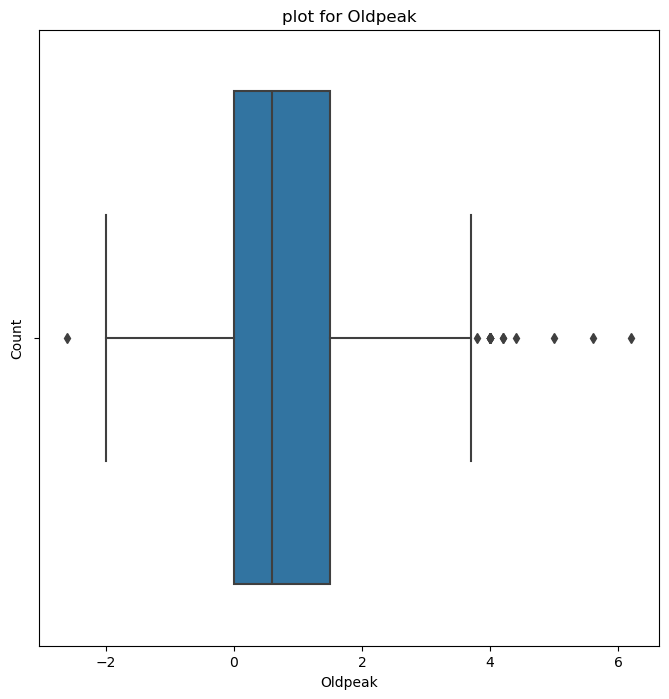

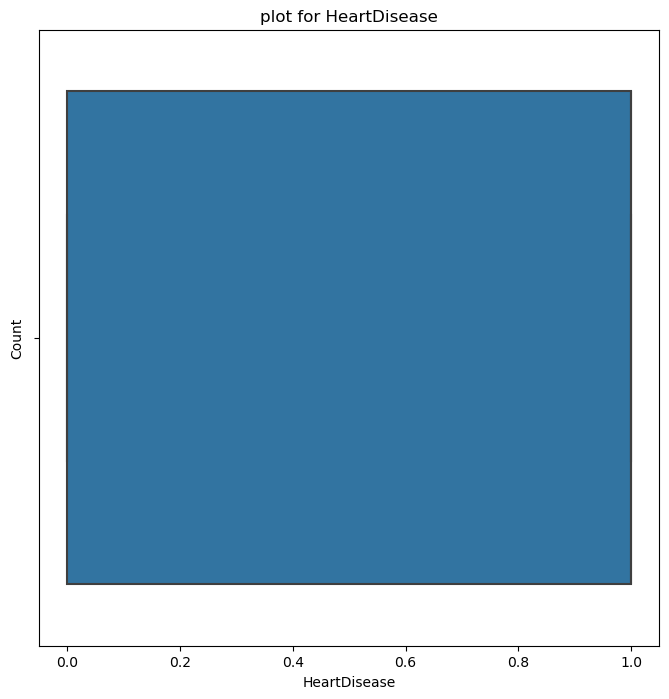

In [8]:
n_columns=data.select_dtypes(include=['float64','int64'])
for column in n_columns:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"plot for {column}")  
    sns.boxplot(x=data[column])  
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Mean: 53.510893246187365
Median: 54.0


C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


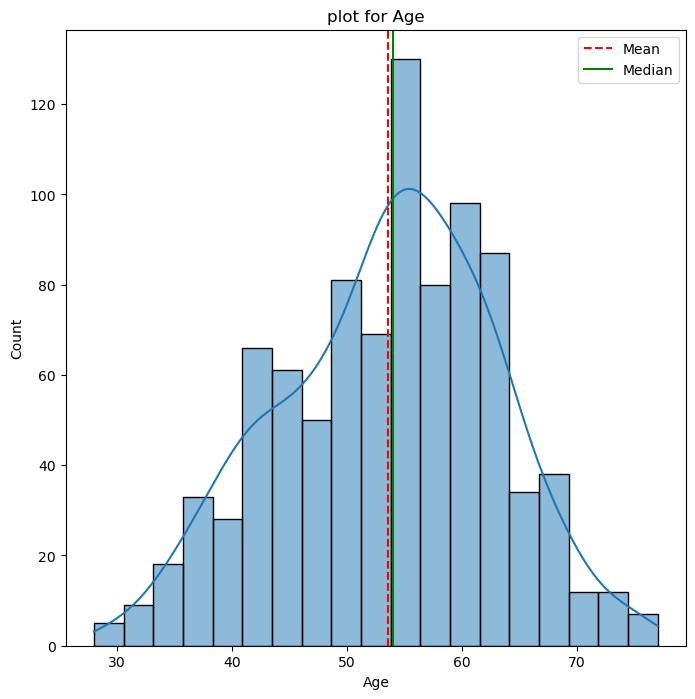

Mean: 132.39651416122004
Median: 130.0


C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


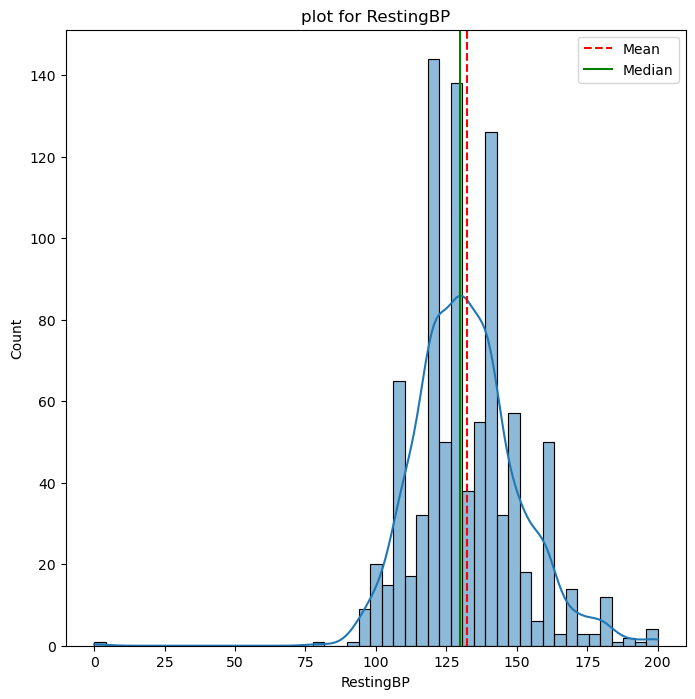

Mean: 198.7995642701525
Median: 223.0


C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


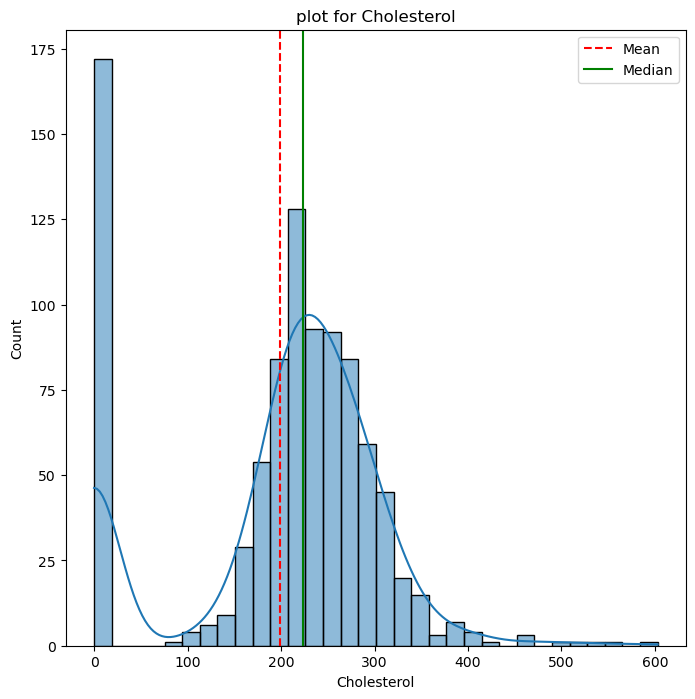

C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 0.23311546840958605
Median: 0.0


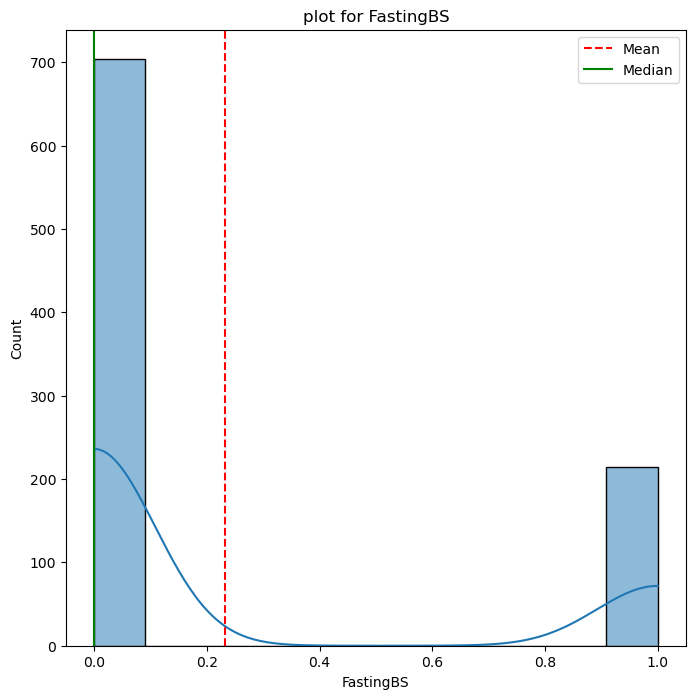

C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 136.80936819172112
Median: 138.0


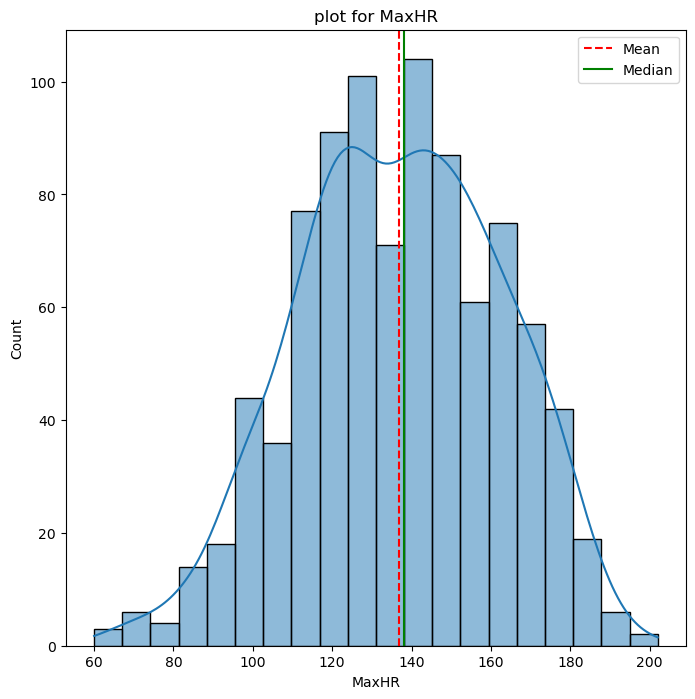

C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 0.8873638344226579
Median: 0.6


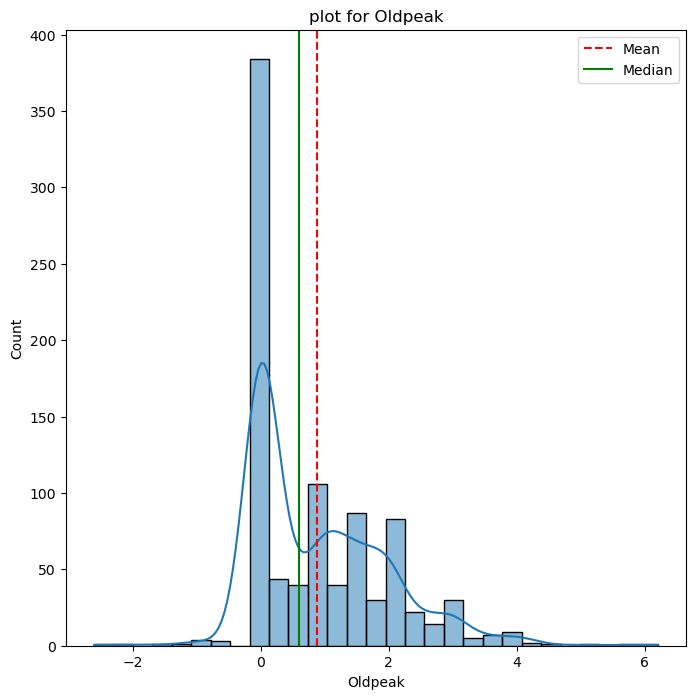

C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 0.5533769063180828
Median: 1.0


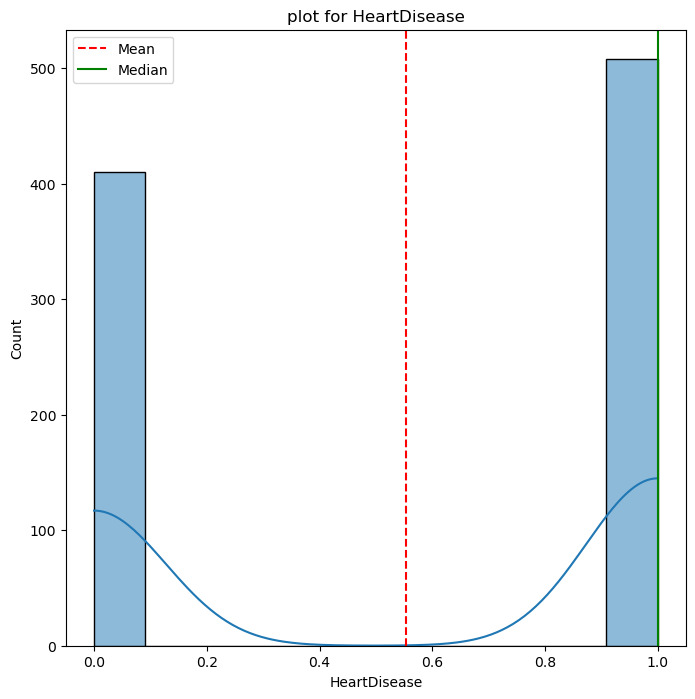

In [9]:
for column in n_columns:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"plot for {column}")  
    sns.histplot(x=data[column],kde=True)  
    mean = data[column].mean()
    median = data[column].median()

    print("Mean:", mean)
    print("Median:", median)



    plt.axvline(mean, color="red", linestyle="--", label="Mean")
    plt.axvline(median, color="green", linestyle="-", label="Median")

    plt.legend()

    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


In [10]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    data_without_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_without_outliers

In [31]:
#remove outliers from data
remove_outliers(data,'Oldpeak')
remove_outliers(data,'FastingBS')
remove_outliers(data,'Cholesterol')
remove_outliers(data,'RestingBP')
remove_outliers(data,'MaxHR')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [30]:
#labeling
labeling=LabelEncoder()
for column in category_column.columns:
    data[column]=labeling.fit_transform(data[column])

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [13]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

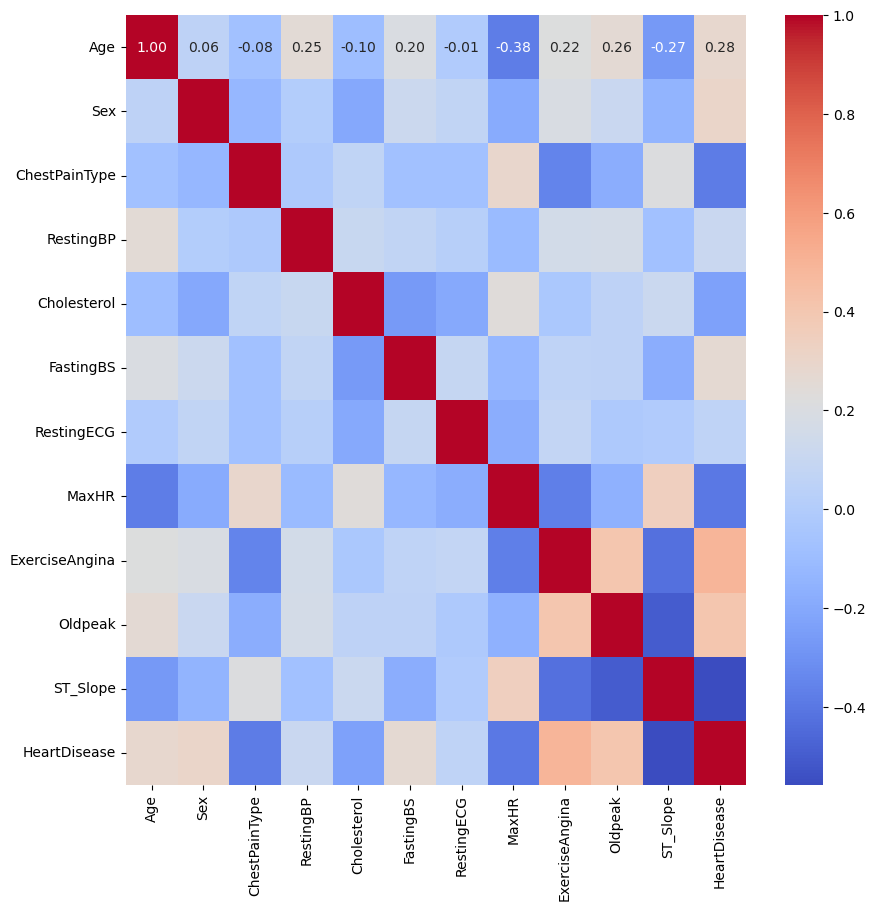

In [14]:
plt.figure(figsize=(10, 10))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [17]:

numeric_data = data
X = add_constant(numeric_data)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           Feature         VIF
0            const  170.409490
1              Age    1.340407
2              Sex    1.138159
3    ChestPainType    1.264834
4        RestingBP    1.116664
5      Cholesterol    1.241641
6        FastingBS    1.168605
7       RestingECG    1.080543
8            MaxHR    1.523811
9   ExerciseAngina    1.600811
10         Oldpeak    1.528789
11        ST_Slope    1.770334
12    HeartDisease    2.054572


In [18]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [19]:
X=data.drop(columns='HeartDisease')
Y=data['HeartDisease']

In [32]:
#spliting data
x_train=data.iloc[:700,:-1]
x_test=data.iloc[700:,:-1] 
y_train=data.iloc[:700,-1]
y_test = data.iloc[700:,-1] 


In [33]:
#scaling data
scale=StandardScaler()
x_train_sc=scale.fit_transform(x_train)
x_test_sc=scale.transform(x_test)

In [24]:
y_train.value_counts()

HeartDisease
1    405
0    295
Name: count, dtype: int64

In [25]:
y_test.value_counts()

HeartDisease
0    115
1    103
Name: count, dtype: int64

In [34]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(x_train_sc)
X_test_pca = pca.transform(x_test_sc)

In [28]:
ridge =RidgeClassifier(alpha=0.6)  
ridge.fit(X_train_pca,y_train)

RidgeClassifier(alpha=0.6)

In [29]:
y_test_pred = ridge.predict(X_test_pca)
y_train_pre=ridge.predict(X_train_pca)
print("accuracy score:train\n",accuracy_score(y_train, y_train_pre)*100)
print("accuracy score:test\n", accuracy_score(y_test, y_test_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

accuracy score:train
 84.85714285714285
accuracy score:test
 81.19266055045871
Confusion Matrix:
 [[106   9]
 [ 32  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       115
           1       0.89      0.69      0.78       103

    accuracy                           0.81       218
   macro avg       0.83      0.81      0.81       218
weighted avg       0.82      0.81      0.81       218

